In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import pow

In [2]:
data=pd.read_csv('Salary_Data.csv')

In [18]:
data.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Visualising the Data

In [12]:
X=np.array(data['YearsExperience'])
Y=np.array(data['Salary'])

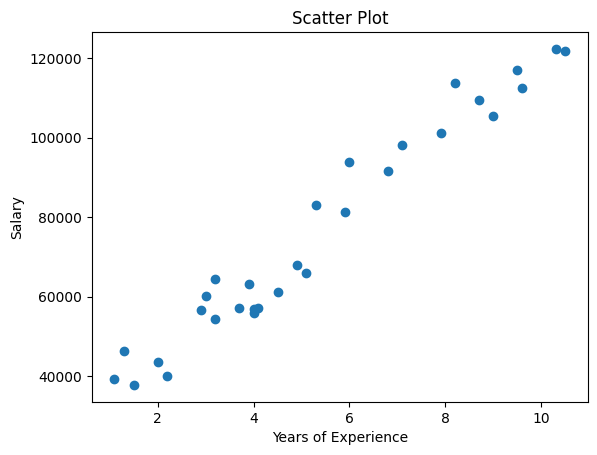

In [14]:
plt.scatter(X, Y)

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scatter Plot')

plt.show()

# Defining the Linear Regression Model and Other Important Functions

In [163]:
def mse_score(m,b,points):

  ss=0

  n=len(points)
  for i in range(n):
    x=points.iloc[i].YearsExperience
    y=points.iloc[i].Salary

    ss=ss+pow((y-(m*x+b)),2)
  
  mse=ss/float(n)
  return mse

In [164]:
def r2_score(m,b,points):

  y_mean=np.mean(points['Salary'])
  rss=0
  tss=0
  n=len(points)

  for i in range(n):
    x=points.iloc[i].YearsExperience
    y=points.iloc[i].Salary  

    rss+=pow((y-(m*x+b)),2)
    tss+=pow((y-y_mean),2)
  
  r2 = 1 - (rss/tss)
  
  return r2

In [165]:
def mae_score(m,b,points):

  abs_diff=0
  n=len(points)

  for i in range(n):

    x=points.iloc[i].YearsExperience
    y=points.iloc[i].Salary  

    abs_diff+=abs(y-(m*x+b))

  mae=abs_diff/float(n)

  return mae

In [166]:
def rmse_score(m,b,points):
  
  mse=mse_score(m,b,points)

  rmse=pow(mse,0.5)

  return rmse

In [167]:
def Linear_Regression(points, epochs, lr):
  
  m=0
  b=0
  n=len(points)

  for i in range(epochs):

    grad_m=0
    grad_b=0

    for j in range(n):

      x=points.iloc[j].YearsExperience
      y=points.iloc[j].Salary

      grad_m+=-((2/n)*(x)*(y-(m*x+b)))
      grad_b+=-((2/n)*(y-(m*x+b)))
    
    m=m-(lr*grad_m)
    b=b-(lr*grad_b)
  
  print("Slope of the Regression Line:",m)
  print("Intercept of the Regression Line:",b)
  print()
  print("Mean Squared Error for Training Dataset:",mse_score(m,b,points))
  print("R2 Score for the Training Dataset:", r2_score(m,b,points))
  print("Mean Absolute Error Score for the Training Dataset:", mae_score(m,b,points))
  print("Root Mean Squared Error for Training Dataset:",rmse_score(m,b,points))


  return [m,b]


In [168]:
def model_evaluate(points, parameters):

  print("For the Test Dataset:\n")
  print("MSE:",mse_score(parameters[0], parameters[1], points))
  print("R2:", r2_score(parameters[0],parameters[1],points))
  print("MAE:", mae_score(parameters[0],parameters[1],points))
  print("RMSE:", rmse_score(parameters[0],parameters[1],points))



In [169]:
def model_plot(model, X_train, X_test, y_train, y_test):

  plt.scatter(X_train, y_train, color='blue', label='Training Data')
  plt.scatter(X_test, y_test, color='lightgreen', label='Test Data')


  plt.xlabel('Years of Experience')
  plt.ylabel('Salary')
  plt.title('Scatter Plot')

  plt.plot(X,model[0]*X+model[1], color='red', label='Regression Line')

  plt.legend()

  plt.show()

## Implementing the model on Salary Data

In [170]:
X=data['YearsExperience']
y=data['Salary']

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [172]:
train=pd.DataFrame()
train['YearsExperience']=X_train
train['Salary']=y_train

test=pd.DataFrame()
test['YearsExperience']=X_test
test['Salary']=y_test

In [173]:
model=Linear_Regression(train,epochs=1000,lr=0.01)

Slope of the Regression Line: 9372.141864857393
Intercept of the Regression Line: 25709.221742972182

Mean Squared Error for Training Dataset: 28932814.53983912
R2 Score for the Training Dataset: 0.9574370749077992
Mean Absolute Error Score for the Training Dataset: 4438.659948278766
Root Mean Squared Error for Training Dataset: 5378.923176606923


In [174]:
model_evaluate(test, model)

For the Test Dataset:

MSE: 37705352.03586251
R2: 0.9415695269135353
MAE: 5134.984786828117
RMSE: 6140.4683889637045


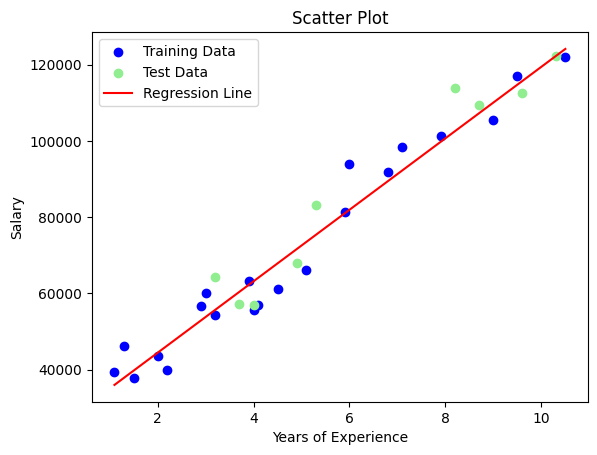

In [175]:
model_plot(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)